In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [2]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
print(df.shape)
new_df = df[df['price']<=1000]
print(df.shape)

(48884, 16)
(48884, 16)


In [4]:
# convert categorical data
cat_columns = pd.get_dummies(new_df, columns=['neighbourhood_group', 'room_type'])
cat_columns.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,1,0,0,0,1,0,0,1,0,0


In [5]:
keep_columns = cat_columns.drop(['name', 'host_name', 'number_of_reviews', 'reviews_per_month', 'last_review'], axis=1)
keep_columns.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,Kensington,40.64749,-73.97237,149,1,6,365,0,1,0,0,0,0,1,0
1,2595,2845,Midtown,40.75362,-73.98377,225,1,2,355,0,0,1,0,0,1,0,0
2,3647,4632,Harlem,40.80902,-73.94190,150,3,1,365,0,0,1,0,0,0,1,0
3,3831,4869,Clinton Hill,40.68514,-73.95976,89,1,1,194,0,1,0,0,0,1,0,0
4,5022,7192,East Harlem,40.79851,-73.94399,80,10,1,0,0,0,1,0,0,1,0,0


In [6]:
# Assign X (data) and y (target)
X = keep_columns[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']]
y = keep_columns['price']
print(X, y.shape)

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                              0                             1   
1                              0                             0   
2                              0                             0   
3                              0                             1   
4                              0                             0   
5                              0                             0   
6                              0                             1   
7                              0                             0   
8                              0                             0   
9                              0                             0   
10                             0                             0   
11                             0                             0   
12                             0                             1   
13                             0                             0   
14        

[48645 rows x 8 columns] (48645,)


In [10]:
# import train_test_split from SKLearn
from sklearn.model_selection import train_test_split
# split data into test and training data using SKLearn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

C:\Users\jeffk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\jeffk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\jeffk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

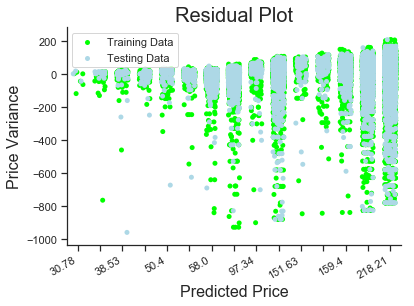

In [14]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Plot y_test_scaled vs predictions

sns.set(style='ticks', context='notebook', rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":16})
ax = sns.stripplot(model.predict(X_train_scaled).round(2), model.predict(X_train_scaled) - y_train, jitter=.25, color="lime", label="Training Data")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right')
sns.despine()
sns.stripplot(model.predict(X_test_scaled).round(2), model.predict(X_test_scaled) - y_test, jitter=.25, color="lightblue", label="Testing Data")
sns.despine()

for ind, label in enumerate(ax.get_xticklabels()):
   if ind % 2 == 0:  # every other label is kept
       label.set_visible(True)
   else:
       label.set_visible(False)

predictions = model.predict(X_test_scaled)

ax.set(xlabel='Predicted Price', ylabel='Price Variance')

plt.title("Residual Plot")
plt.legend(labels=['Training Data', 'Testing Data'])


leg = ax.get_legend()
leg.legendHandles[0].set_color('lime')
leg.legendHandles[1].set_color('lightblue')
plt.show()

In [15]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - model.predict(X_train_scaled)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - model.predict(X_test_scaled)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 9776.331876343804
Fit a model X_train, and calculate MSE with X_test, Y_test: 10324.538591380857


In [16]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 10324.538591380546, R2: 0.2736442314779345


In [17]:
# LASSO model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10325.115313238313, R2: 0.2736036577278812


C:\Users\jeffk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10325.07237995205, R2: 0.2736066781863611


In [19]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10325.54920212979, R2: 0.2735731326156514
